In [1]:
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

/Users/dishamendiratta/opt/anaconda3/envs/exp-tracking-env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading Data

In [2]:
df = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')

Shape of Dataset

In [4]:
print(len(df))

1154112


In [ ]:
old_len = len(df)

Sample Dataset

In [29]:
df.sample(5)

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
974618,B03226,2021-01-27 09:58:38,2021-01-27 09:59:43,-1,72,None,B02875,1.083333
1019934,B01899,2021-01-28 10:38:53,2021-01-28 10:47:56,-1,-1,None,B01899,9.050000
1071812,B02111,2021-01-29 12:28:27,2021-01-29 12:43:02,95,92,None,B02111,14.583333
199367,B01536,2021-01-06 22:35:57,2021-01-06 22:45:17,-1,94,None,B01536,9.333333
146862,B01653,2021-01-05 15:42:29,2021-01-05 16:11:11,29,89,None,B01653,28.700000


Computing Trip Duration

In [6]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime
df['duration'] = df.duration.dt.total_seconds() / 60

In [10]:
df['duration'].mean()

19.1672240937939

# Outliers 

/Users/dishamendiratta/opt/anaconda3/envs/exp-tracking-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Duration Boxplot')]

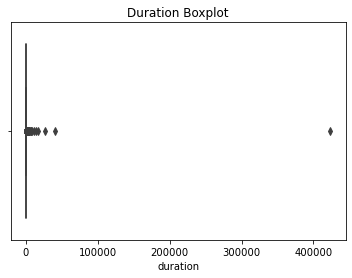

In [11]:
sns.boxplot(df['duration']).set(title = 'Duration Boxplot')

In [13]:
df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]

Removed Rows

In [16]:
old_len - len(df)

44286

# One Hot Encoding

In [17]:
categorical = ['PUlocationID', 'DOlocationID']

df[categorical] = df[categorical].fillna(-1).astype('int')

In [18]:
len(df[df['PUlocationID'] == -1])/len(df)

0.8352732770722617

In [19]:
df[categorical] = df[categorical].astype('str')

In [20]:
train_dicts = df[categorical].to_dict(orient='records')

In [22]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

# Training Data

In [57]:
X_train.shape

(1109826, 525)

In [23]:
y_train = df.duration.values

In [24]:
len(dv.feature_names_)

525

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(X_train)

Train RMSE

In [27]:
mean_squared_error(y_train, y_pred, squared=False)

10.528519107211398

## Model Evaluation

In [30]:
categorical = ['PUlocationID', 'DOlocationID']

def read_data(filename):
    df = pd.read_parquet(filename)
    
    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')
    
    return df

In [31]:
df_val = read_data('./data/fhv_tripdata_2021-02.parquet')

In [32]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [33]:
X_val = dv.transform(val_dicts) 

In [34]:
y_pred = lr.predict(X_val)

In [35]:
y_val = df_val.duration.values

In [36]:
mean_squared_error(y_val, y_pred, squared=False)

11.014283186586992